In [1]:
! uv pip install E:\Work\ruzt\msyrs --upgrade

Using Python 3.12.4 environment at: E:\Work\ruzt\msyrs\.venv
Resolved 34 packages in 113ms
   Building msyrs @ file:///E:/Work/ruzt/msyrs
      Built msyrs @ file:///E:/Work/ruzt/msyrs
Prepared 1 package in 15.07s
Uninstalled 1 package in 6ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 26ms
 ~ msyrs==0.0.1 (from file:///E:/Work/ruzt/msyrs)


### Import Python packages


In [2]:
import macrosynergy
import pandas as pd
import numpy as np
import polars as pl
import os

from macrosynergy.panel import view_timelines
from macrosynergy.management.types import QuantamentalDataFrame


### Import Python bindings - `msyrs`


In [3]:
import msyrs

In [4]:
DATA_FOLDER_PATH = "E:/Work/jpmaqs-data"
# DATA_FOLDER_PATH = "C:/Users/PalashTyagi/Code/go-dataquery/jpmaqs-data"
DQ_CLIENT_ID = os.getenv("DQ_CLIENT_ID")
DQ_CLIENT_SECRET = os.getenv("DQ_CLIENT_SECRET")

In [5]:
import time

nb_start_time = time.time()

In [6]:
dfpath = f"{DATA_FOLDER_PATH}/data/ADPEMPL_SA_P1M1ML1/USD_ADPEMPL_SA_P1M1ML1.csv"

starttime = time.time()
ldf: pl.DataFrame = msyrs.qdf.load_qdf(dfpath)
print(f"Time taken to load qdf: {time.time() - starttime}")
ldf.head(5)

Time taken to load qdf: 0.004152774810791016


shape: (5, 7)
┌────────────┬─────┬────────────────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat               ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---                ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str                ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪════════════════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2010-03-03 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 3       ┆ 33      │
│ 2010-03-04 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 4       ┆ 34      │
│ 2010-03-05 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 5       ┆ 35      │
│ 2010-03-08 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 8       ┆ 38      │
│ 2010-03-09 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 9       ┆ 39      │
└────────────┴─────┴────────────────────┴───────────┴─────────┴─────────┴─────────┘

In [7]:
cids_dm = "AUD.CAD.CHF.EUR.GBP.JPY.NOK.NZD.SEK.USD".split(".")
cids_em = "CLP.COP.CZK.HUF.IDR.ILS.INR.KRW.MXN.PLN.THB.TRY.TWD.ZAR".split(".")
cids = cids_dm + cids_em
cids_dux = list(set(cids) - set(["IDR", "NZD"]))
ecos = (
    "CPIC_SA_P1M1ML12.CPIC_SJA_P3M3ML3AR.CPIC_SJA_P6M6ML6AR.CPIH_SA_P1M1ML12."
    "CPIH_SJA_P3M3ML3AR.CPIH_SJA_P6M6ML6AR.INFTEFF_NSA.INTRGDP_NSA_P1M1ML12_3MMA."
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA.PCREDITGDP_SJA_D1M1ML12.RGDP_SA_P1Q1QL4_20QMA."
    "RYLDIRS02Y_NSA.RYLDIRS05Y_NSA.PCREDITBN_SJA_P1M1ML12".split(".")
)

mkts = (
    "DU02YXR_NSA.DU05YXR_NSA.DU02YXR_VT10.DU05YXR_VT10.EQXR_NSA.EQXR_VT10."
    "FXXR_NSA.FXXR_VT10.FXCRR_NSA.FXTARGETED_NSA.FXUNTRADABLE_NSA".split(".")
)
xcats = ecos + mkts

tickers = [f"{c}_{x}" for c in cids for x in xcats]

In [8]:
starttime = time.time()

big_df: pl.DataFrame = msyrs.qdf.load_qdf_from_download_bank(
    folder_path=DATA_FOLDER_PATH,
    xcats=xcats,
)
print(f"Time taken to load qdf batch: {time.time() - starttime}")


Time taken to load qdf batch: 1.272113561630249


In [9]:
big_df.estimated_size("mb")

286.9081144332886

In [10]:
starttime = time.time()

test_df = msyrs.qdf.reduce_dataframe(df=big_df, xcats=mkts)

print(f"Time taken to reduce qdf: {time.time() - starttime}")
print(test_df.estimated_size("mb"))
test_df = None

Time taken to reduce qdf: 1.104046106338501
99.40825939178467


In [11]:
sel_cids = ["USD", "EUR", "GBP", "AUD", "CAD", "CHF", "JPY", "INR"]
start = "2000-01-01"

In [12]:
eq_xcats = [xc for xc in xcats if xc.startswith("EQ")]
starttime = time.time()

eq_df = msyrs.qdf.reduce_dataframe(
    df=big_df, cids=sel_cids, xcats=eq_xcats, start=start
)

print(f"Time taken to reduce qdf: {time.time() - starttime}")

Time taken to reduce qdf: 0.3886435031890869


In [13]:
fx_xcats = [xc for xc in xcats if xc.startswith("FX")]

starttime = time.time()

fx_df = msyrs.qdf.reduce_dataframe(
    df=big_df, cids=sel_cids, xcats=fx_xcats, start=start
)
new_df: pl.DataFrame = msyrs.qdf.update_dataframe(df=eq_df, df_add=fx_df)

print(f"Time taken to reduce qdf: {time.time() - starttime}")

Time taken to reduce qdf: 0.5512661933898926


In [14]:
starttime = time.time()

new_df: pl.DataFrame = msyrs.qdf.update_dataframe(df=eq_df, df_add=fx_df)

print(f"Time taken to update qdf: {time.time() - starttime}")

Time taken to update qdf: 0.03021550178527832


In [15]:
msyrs.utils.get_bdates_series_default_opt(start_date='1971-01-01', end_date='2040-05-01', freq='D')

shape: (18_088,)
Series: 'bdates' [date]
[
	1971-01-01
	1971-01-04
	1971-01-05
	1971-01-06
	1971-01-07
	…
	2040-04-25
	2040-04-26
	2040-04-27
	2040-04-30
	2040-05-01
]

In [16]:
msyrs.utils.get_bdates_series_default_pl(start_date='2000-01-01', end_date='2020-05-01', freq='D').dtype

Date

In [17]:
wdf = QuantamentalDataFrame(new_df.to_pandas()).to_wide()
# wdf.values[np.random.rand(*wdf.shape) < 0.0001] = np.nan
wdf = QuantamentalDataFrame.from_wide(wdf, categorical=False)
# cast column 'real_date' to pl.Date
new_df = pl.DataFrame(wdf).with_columns(
    pl.col("real_date").cast(pl.Date, strict=True)
)

In [18]:
msyrs.utils.create_blacklist_from_qdf(new_df)

{'JPY_FXCRR_NSA': ['2000-01-03',
  '2000-01-04',
  '2000-01-05',
  '2000-01-06',
  '2000-01-07',
  '2000-01-10',
  '2000-01-11',
  '2000-01-12',
  '2000-01-13',
  '2000-01-14',
  '2000-01-18',
  '2000-01-19',
  '2000-01-20',
  '2000-01-21',
  '2000-01-24',
  '2000-01-25',
  '2000-01-26',
  '2000-01-27'],
 'INR_EQXR_VT10': ['2000-01-03',
  '2000-01-04',
  '2000-01-05',
  '2000-01-06',
  '2000-01-07',
  '2000-01-10',
  '2000-01-11',
  '2000-01-12',
  '2000-01-13',
  '2000-01-14',
  '2000-01-18',
  '2000-01-19',
  '2000-01-20',
  '2000-01-21',
  '2000-01-24',
  '2000-01-25',
  '2000-01-26',
  '2000-01-27',
  '2000-01-28',
  '2000-01-31',
  '2000-02-01',
  '2000-02-02',
  '2000-02-03',
  '2000-02-04',
  '2000-02-07',
  '2000-02-08',
  '2000-02-09',
  '2000-02-10',
  '2000-02-11',
  '2000-02-14',
  '2000-02-15',
  '2000-02-16',
  '2000-02-17',
  '2000-02-18',
  '2000-02-22',
  '2000-02-23',
  '2000-02-24',
  '2000-02-25',
  '2000-02-28',
  '2000-02-29',
  '2000-03-01',
  '2000-03-02',
  '20

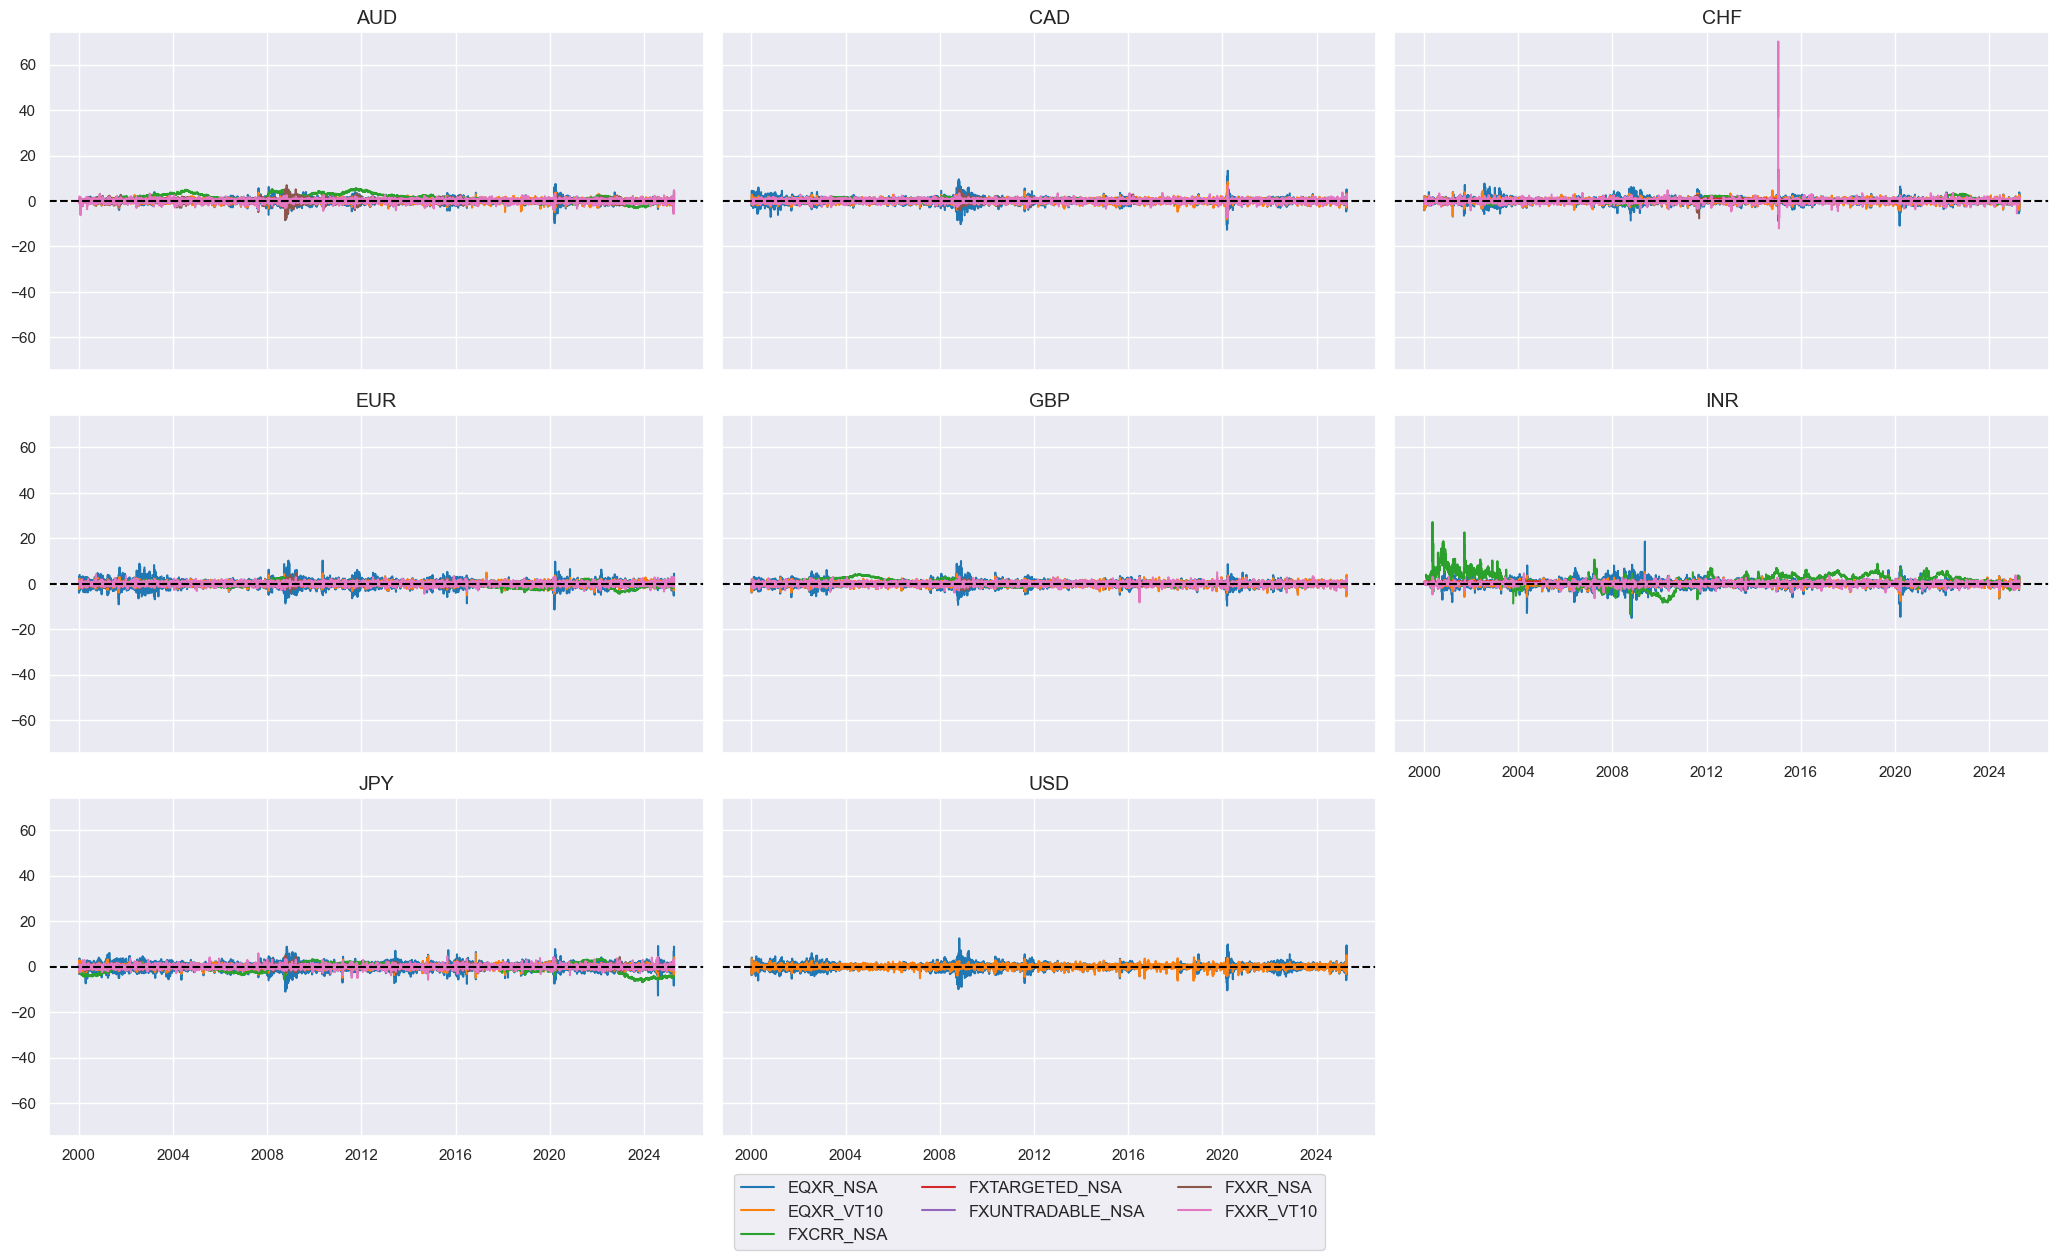

In [19]:
view_timelines(df=new_df.to_pandas())

In [20]:
end_time = time.time()
print(f"Time taken: {end_time - nb_start_time} seconds")

Time taken: 5.657067060470581 seconds
